In [6]:
!pip install matplotlib

In [7]:
import  numpy as np
import math
import matplotlib.pyplot as plt   
import random

# 情報計算科学の基礎 
レポート3



In [8]:
def gausselimination_withpivot(n,A,b):
  x = np.zeros(n)
  Aorg = np.copy(A)
  borg = np.copy(b)

  #前進消去
  for j in range(n):
    #ピポット選択
    if A[j][j] == 0:
      list = [A[i][j] for i in range(j+1,n)]
      abs_list = [abs(i) for i in list]
      m = abs_list.index(max(abs_list))
      p = m + j + 1
      #交換
      b[j],b[p] = b[p],b[j]
      for c in range(n):
        A[j][c],A[p][c] = A[p][c],A[j][c]

    for i in range(j+1,n,1):
      coe=-A[i][j]/A[j][j]
      for k in range(j,n,1):
        A[i][k]+=coe*A[j][k]
      b[i]+=coe*b[j]
    
  #後退代入・結果出力
  for j in range(n-1,-1,-1):
    btmp=b[j]
    for i in range(n-1,j,-1):
      btmp -= A[j][i]*x[i]
    x[j]=btmp/A[j][j]
  return x

In [17]:
EPSILON =  0.0001

def fill_eigenlist(mat_to_solve_in,is_inv=False):
    n_size_in = len(mat_to_solve_in)
    EValues = [0 for x in range(n_size_in)] # list for eigenvalues
    EVectors = [ np.zeros(n_size_in) for x in range(n_size_in) ] # list for eigenvectors

    # print('Evectors')
    # print(EVectors)
    EV_list_in:list = list()
    for i in range(n_size_in):
        if is_inv:
            eigen = calc_eigen_inv(mat_to_solve_in,EVectors)
        else :
            eigen = calc_eigen_conv(mat_to_solve_in,EVectors)
        EVectors[i] = eigen['vector']
        EValues[i] = eigen['value']
        to_append = {
            'value':eigen['value'],
            'vector':eigen['vector']
        }
        EV_list_in.append(to_append)
    # print(eigen)
    # print("EVectors[0]")
    # print(EVectors[0])
    # print('Evectors')
    # print(EVectors)
    # eigen = calc_eigen_conv(mat_to_solve_in,EVectors)
    EV_dict_in = {
        'values':EValues,
        'vectors':EVectors
    }
    

    return EV_dict_in,EV_list_in

def normarize_vecter(vector_in):
    n_length_in = len(vector_in)
    answer_in = np.zeros(n_length_in)
    first_elem = vector_in[0]
    for i,elements in enumerate(vector_in):
        answer_in[i] = vector_in[i] / first_elem
    return answer_in

def protter(EV_list_in,COORD_in,is_inv=False):
    n_size_in = len(EV_list_in)
    for i,ei in enumerate(EV_list_in):
        vec = [0]
        normed_vec = normarize_vecter(ei['vector'])
        for element in normed_vec:
            vec.append(element)
        
        if is_inv:
            mode_num = i + 1
        else:
            mode_num = n_size_in - i
        
        plt.plot(vec,COORD_in,label=f"{mode_num}th mode")
        print(f"{mode_num}th mode:\n\tcharactaristic frequency\t:{math.sqrt(-ei['value'])}\n\teigan value\t\t\t:{ei['value']},\n\teigan vector\t\t\t:{normed_vec} ")

def calc_eigen_conv(mat_to_solve_in,EVectors_in:list):
    n_size_in = len(mat_to_solve_in)
    y_in = np.random.rand(n_size_in)
    
    Ayj = mat_to_solve_in @ y_in
    y_in = (Ayj)/(np.linalg.norm(Ayj))
    u_in = np.dot(Ayj,y_in)

    u_error_rate = 100
    while u_error_rate > EPSILON:
        u_formar = u_in
        y_formar = y_in
        Ayj = mat_to_solve_in @ y_formar

        frac = Ayj # yjを求める分数の分母
        for xj in EVectors_in:
            frac-= (np.dot(xj,Ayj))*xj
        y_in = (frac)/(np.linalg.norm(frac))
        u_in = np.dot(mat_to_solve_in @ y_in , y_in)

        u_error_rate = abs(-1 + u_in/u_formar )
        # print(f'u_error_rate\t:{u_error_rate}')
        # print(f'u_in\t\t:{u_in}')
        # print(f'u_error_rate:{u_error_rate}')

    eigenvalue = u_in
    eigenvector = np.zeros(n_size_in)
    # print(eigenvalue)

    # for i,yelement in enumerate(y_in):
    #     eigenvector[i] = (yelement/y_in[0])
    
    eigenvector = y_in
    # print('eigenvector')
    # print(eigenvector)
    # print('y_in')
    # print(y_in)
    # print('y_in[0]:')
    # print(y_in[0])

    eigen = {
                'value':eigenvalue,
                'vector':eigenvector
            }
    return eigen

def inv_mat(A):
    n_size_of_A = len(A)
    X = np.eye(n_size_of_A)
    #まずAを上三角行列にする。
    A = A.astype('float64')
    for p in range(n_size_of_A):
        pivot = A[p][p]
        for j in range(p+1, n_size_of_A):
            coef = A[j][p] / pivot
            A[j] -= A[p] * coef
            X[j] -= X[p] * coef
    #途中経過確認。
    #print(A)
    #print(X)
    #対角成分を1にする。
    for i in range(n_size_of_A):
        X[i] /= A[i][i]
        A[i] /= A[i][i]
    #途中経過確認。
    #print(A)
    #print(X)
    #答えを出す。
    for i in range(n_size_of_A-1,0,-1):
        for j in range(i):
            X[j] -= X[i] * A[j][i]
            A[j][i] = 0
    return X

def calc_eigen_inv(mat_to_solve_in,EVectors_in:list):
    n_size_in = len(mat_to_solve_in)
    e_i = np.zeros(n_size_in) # base vector
    mat_inverse = inv_mat(mat_to_solve_in)
    
    # print('mat_inverse')
    # print(mat_inverse)
    # print('conv@inv')
    # print(mat_inverse @ mat_to_solve)


    eigen = calc_eigen_conv(mat_inverse,EVectors_in)
    eigen['value'] = 1 / eigen['value']

    return eigen
    

mat_to_solve = np.array(([-2, 1],[ 1,-1]))
EV_dict,EV_list = fill_eigenlist(mat_to_solve)
print(EV_dict)
print(EV_list)

# print((-3-math.sqrt(5))/2)
# print((-3+math.sqrt(5))/2)



{'values': [-2.6180301931881704, -0.38196980681182946], 'vectors': [array([ 0.85133504, -0.52462239]), array([-0.52462239, -0.85133504])]}
[{'value': -2.6180301931881704, 'vector': array([ 0.85133504, -0.52462239])}, {'value': -0.38196980681182946, 'vector': array([-0.52462239, -0.85133504])}]


(1) n=2のmode

2th mode:
	charactaristic frequency	:1.6180329348616178
	eigan value			:-2.6180305782969007,
	eigan vector			:[ 1.         -0.61974201] 
1th mode:
	charactaristic frequency	:0.6180367478581669
	eigan value			:-0.38196942170309933,
	eigan vector			:[1.         1.61357466] 


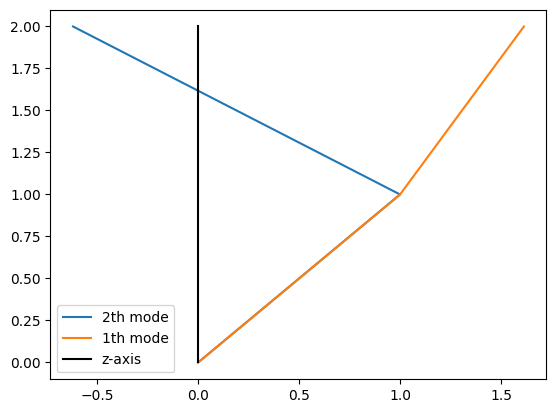

In [ ]:
mat_to_solve = np.array(([-2, 1],[ 1,-1]))
EV_dict,EV_list = fill_eigenlist(mat_to_solve)
# print(EV_dict)
# print(EV_list)
n_size_in = len(mat_to_solve)
COORD = [num for num in range(n_size_in + 1)]

protter(EV_list,COORD)

# plt.plot([0,-0.85099324,  0.52517665],[0,1,2] )
plt.plot([0,0],[0,2],color='#000000',label='z-axis')
plt.legend()
plt.show()

2th mode:
	charactaristic frequency	:1.6180325349761728
	eigan value			:-2.6180292842414197,
	eigan vector			:[ 0.85141248 -0.5244967 ] 
1th mode:
	charactaristic frequency	:0.6180377947654826
	eigan value			:-0.38197071575858077,
	eigan vector			:[-0.5244967  -0.85141248] 

(2) n=6の場合

6th mode:
	charactaristic frequency	:1.9416774631433877
	eigan value			:-3.770111370878942,
	eigan vector			:[ 0.24140602 -0.43780104  0.54559405 -0.53139041  0.38715877 -0.14181976] 
5th mode:
	charactaristic frequency	:1.7710696900605294
	eigan value			:-3.1366878470510993,
	eigan vector			:[ 0.47437864 -0.53664458  0.14366648  0.35336543 -0.52966601  0.24682837] 
4th mode:
	charactaristic frequency	:1.4970773730478377
	eigan value			:-2.241240660891815,
	eigan vector			:[-0.5475147   0.12066518  0.52335571 -0.2471019  -0.46408552  0.3678745 ] 
3th mode:
	charactaristic frequency	:1.136153470330008
	eigan value			:-1.2908447081429202,
	eigan vector			:[-0.51567342 -0.37173685  0.25081003  0.55219357  0.13818274 -0.45713757] 
2th mode:
	charactaristic frequency	:0.7092242510686345
	eigan value			:-0.5029990383038655,
	eigan vector			:[-0.36522424 -0.54880278 -0.45785099 -0.13563647  0.25700452  0.52091329] 
1th mode:
	charactaristic frequency	:0.24107338038729548
	eigan value			:-0.05

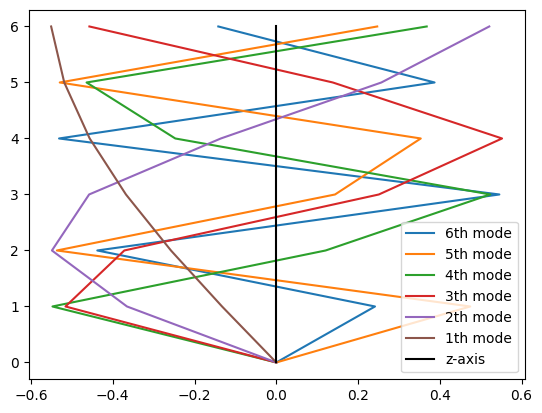

In [91]:
mat_to_solve = np.array(([-2, 1, 0, 0, 0, 0,],[ 1,-2, 1, 0, 0, 0],[ 0, 1,-2, 1, 0, 0],[ 0, 0, 1,-2, 1, 0],[ 0, 0, 0, 1,-2, 1],[ 0, 0, 0, 0, 1,-1]))
EV_dict,EV_list = fill_eigenlist(mat_to_solve)
# print(EV_dict)
# print(EV_list)
n_size_in = len(mat_to_solve)
COORD = [num for num in range(n_size_in + 1)]

for i,ei in enumerate(EV_list):
    vec = [0]
    for element in ei['vector']:
        vec.append(element)
    
    plt.plot(vec,COORD,label=f"{n_size_in - i}th mode")
    print(f"{n_size_in - i}th mode:\n\tcharactaristic frequency\t:{math.sqrt(-ei['value'])}\n\teigan value\t\t\t:{ei['value']},\n\teigan vector\t\t\t:{ei['vector']} ")

# plt.plot([0,-0.85099324,  0.52517665],[0,1,2] )
plt.plot([0,0],[0,n_size_in],color='#000000',label='z-axis')
plt.legend()
plt.show()

正規化をすると以下のようになった。

6th mode:
	charactaristic frequency	:1.9417103499794979
	eigan value			:-3.770239083217504,
	eigan vector			:[ 1.         -1.73621378  2.03532815 -1.85817707  1.28327267 -0.45608552] 
5th mode:
	charactaristic frequency	:1.7710196976398414
	eigan value			:-3.136510769428315,
	eigan vector			:[ 1.         -1.10638505  0.23075585  0.85147137 -1.21106562  0.55751139] 
4th mode:
	charactaristic frequency	:1.4970967083112257
	eigan value			:-2.241298554036307,
	eigan vector			:[ 1.         -0.23543719 -0.96347467  0.47458665  0.86901323 -0.69921739] 
3th mode:
	charactaristic frequency	:1.136156083745234
	eigan value			:-1.2908506466313074,
	eigan vector			:[ 1.          0.70166628 -0.49721844 -1.04474302 -0.24773071  0.86204474] 
2th mode:
	charactaristic frequency	:0.7092140086992829
	eigan value			:-0.5029845101353065,
	eigan vector			:[ 1.          1.50024423  1.24819287  0.3669257  -0.70192915 -1.41824728] 
1th mode:
	charactaristic frequency	:0.24107350860528026
	eigan value			:-0.058

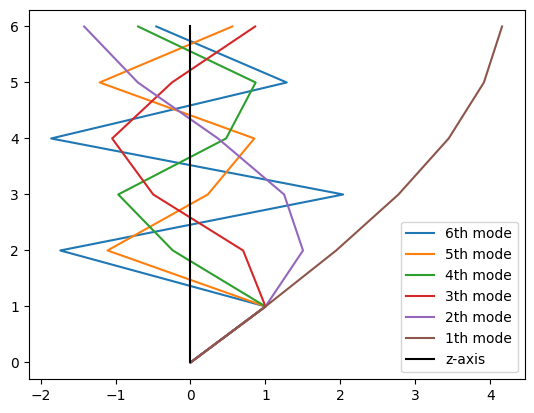

In [14]:
mat_to_solve = np.array(([-2, 1, 0, 0, 0, 0,],[ 1,-2, 1, 0, 0, 0],[ 0, 1,-2, 1, 0, 0],[ 0, 0, 1,-2, 1, 0],[ 0, 0, 0, 1,-2, 1],[ 0, 0, 0, 0, 1,-1]))
EV_dict,EV_list = fill_eigenlist(mat_to_solve)
# print(EV_dict)
# print(EV_list)
n_size_in = len(mat_to_solve)
COORD = [num for num in range(n_size_in + 1)]

protter(EV_list,COORD)

# plt.plot([0,-0.85099324,  0.52517665],[0,1,2] )
plt.plot([0,0],[0,n_size_in],color='#000000',label='z-axis')
plt.legend()
plt.show()

(3) n=6 を逆べき乗法で解く


1th mode:
	charactaristic frequency	:0.24107336116062464
	eigan value			:-0.05811636546128096,
	eigan vector			:[1.         1.9416943  2.77054064 3.43861922 3.90706299 4.1484292 ] 
2th mode:
	charactaristic frequency	:0.7092100661053015
	eigan value			:-0.5029789178650861,
	eigan vector			:[ 1.          1.49844322  1.24495595  0.36289182 -0.70236142 -1.41316049] 
3th mode:
	charactaristic frequency	:1.1361515628796055
	eigan value			:-1.2908403738337704,
	eigan vector			:[ 1.          0.71967034 -0.49105408 -1.07675385 -0.26766164  0.89465739] 
4th mode:
	charactaristic frequency	:1.4970277334726472
	eigan value			:-2.2410920347862513,
	eigan vector			:[ 1.         -0.24493419 -0.91886138  0.4574455   0.79176941 -0.63762537] 
5th mode:
	charactaristic frequency	:1.7709623316877243
	eigan value			:-3.136307580256821,
	eigan vector			:[ 1.         -1.14382766  0.28229339  0.86529306 -1.29747842  0.6105383 ] 
6th mode:
	charactaristic frequency	:1.9416872296857703
	eigan value			:-3.77014

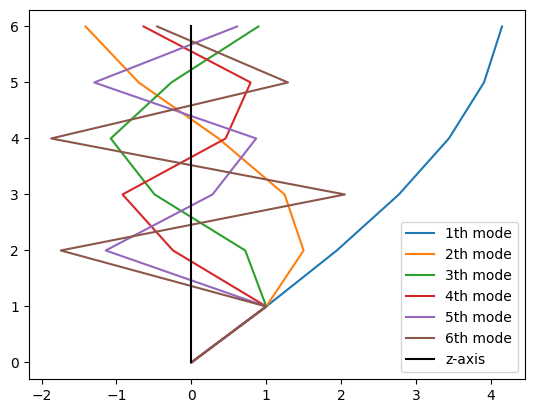

In [18]:
mat_to_solve = np.array(([-2, 1, 0, 0, 0, 0,],[ 1,-2, 1, 0, 0, 0],[ 0, 1,-2, 1, 0, 0],[ 0, 0, 1,-2, 1, 0],[ 0, 0, 0, 1,-2, 1],[ 0, 0, 0, 0, 1,-1]))
EV_dict,EV_list = fill_eigenlist(mat_to_solve,True)
# print(EV_dict)
# print(EV_list)
n_size_in = len(mat_to_solve)
COORD = [num for num in range(n_size_in + 1)]

protter(EV_list,COORD,True)

# plt.plot([0,-0.85099324,  0.52517665],[0,1,2] )
plt.plot([0,0],[0,n_size_in],color='#000000',label='z-axis')
plt.legend()
plt.show()